# E-commerce Customer Behavior Analysis  
## Exploratory Data Analysis & Data Cleaning

### Project Overview
This project analyzes customer-level e-commerce behavior to understand spending patterns, loyalty, satisfaction, and retention risk.  
The goal is to prepare high-quality features for customer segmentation, churn analysis, and machine learning modeling.

This notebook focuses on:
- Data understanding and validation
- Exploratory Data Analysis (EDA)
- Business-driven insights
- Preparing a clean foundation for ML and Tableau


## 1. Import Required Libraries


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


## 2. Load Dataset

The dataset represents aggregated customer behavior metrics including spend, purchase frequency, loyalty tier, discounts, satisfaction, and recency.
Each row corresponds to a unique customer.


In [24]:
df = pd.read_csv("../data/raw/ecommerce_customer_behavior.csv")
df.head()



,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


## 3. Column Standardization

Column names are standardized for consistency and ease of use in analysis, machine learning, and SQL-style operations.


In [9]:
df = df.rename(columns={
    "Customer ID": "customer_id",
    "Gender": "gender",
    "Age": "age",
    "City": "city",
    "Membership Type": "membership_type",
    "Total Spend": "total_spend",
    "Items Purchased": "items_purchased",
    "Average Rating": "avg_rating",
    "Discount Applied": "discount_applied",
    "Days Since Last Purchase": "days_since_last_purchase",
    "Satisfaction Level": "satisfaction_level"
})

df.head()


,customer_id,gender,age,city,membership_type,total_spend,items_purchased,avg_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


## 4. Dataset Structure & Data Types

Reviewing structure helps identify potential data quality issues early.


df.info()


In [11]:
df.shape

(350, 11)

## 5. Missing Values Assessment

Missing values are codf.isna().sum()
mmon in real-world customer data.
We identify them before deciding how to handle them in modeling.


In [13]:
df.isna().sum()


customer_id                 0
gender                      0
age                         0
city                        0
membership_type             0
total_spend                 0
items_purchased             0
avg_rating                  0
discount_applied            0
days_since_last_purchase    0
satisfaction_level          2
dtype: int64

## 6. Descriptive Statistics

Understanding the range and distribution of key numerical features.


In [14]:
df.describe()


,customer_id,age,total_spend,items_purchased,avg_rating,days_since_last_purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


## 7. Distribution of Total Spend

This helps identify:
- High-value customers
- Skewness in customer spending
- Potential segmentation thresholds


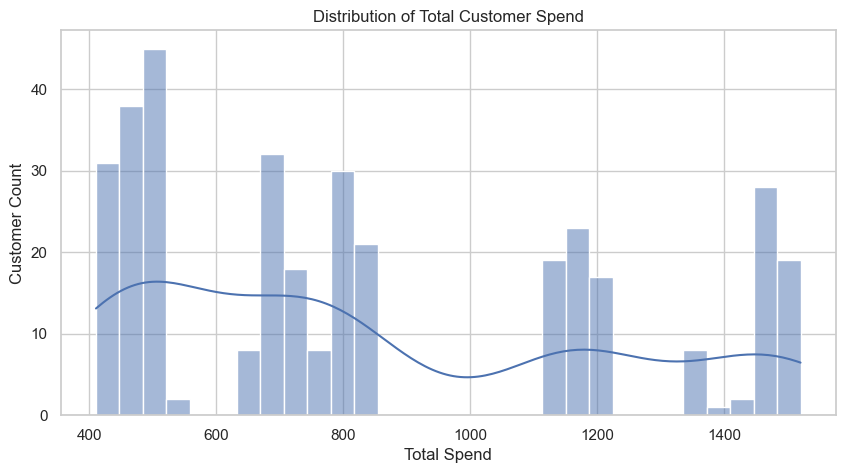

In [15]:
sns.histplot(df["total_spend"], bins =30, kde = True)
plt.title("Distribution of Total Customer Spend")
plt.xlabel("Total Spend")
plt.ylabel("Customer Count")
plt.show()

## 8. Items Purchased Distribution

Analyzing purchase frequency across customers.


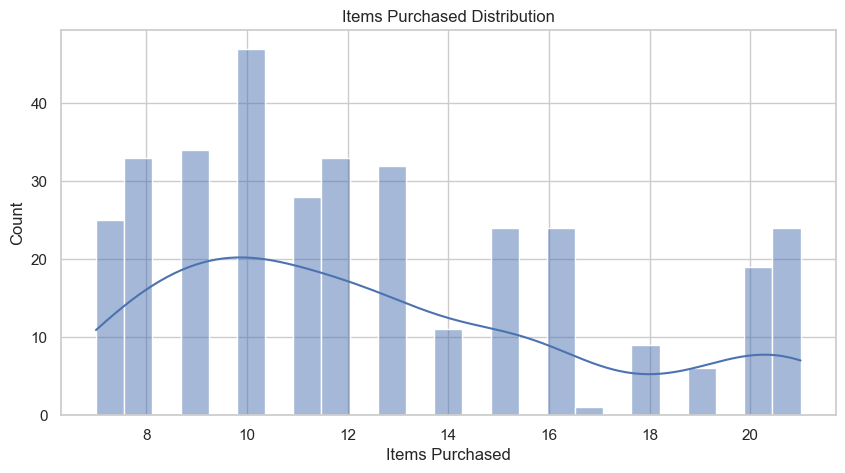

In [16]:
sns.histplot(df["items_purchased"], bins=25, kde=True)
plt.title("Items Purchased Distribution")
plt.xlabel("Items Purchased")
plt.show()


## 9. Recency: Days Since Last Purchase

This variable is a strong proxy for churn and retention risk.


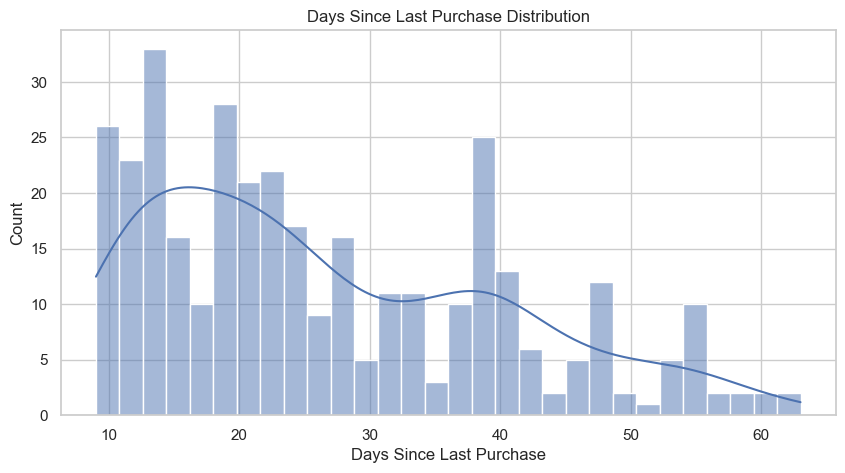

In [17]:
sns.histplot(df["days_since_last_purchase"], bins=30, kde=True)
plt.title("Days Since Last Purchase Distribution")
plt.xlabel("Days Since Last Purchase")
plt.show()


## 10. Membership Type & Spending Behavior

Understanding how loyalty tiers impact revenue.


In [18]:
df.groupby("membership_type")["total_spend"].agg(
    customers = "count",
    avg_spend = "mean",
    total_revenue = "sum"
).sort_values("avg_spend", ascending = False)

,customers,avg_spend,total_revenue
membership_type,,,
Gold,117,1311.144444,153403.9
Silver,117,748.432479,87566.6
Bronze,116,473.388793,54913.1


## 11. Discount Impact on Spending

Evaluates whether discounts attract higher-value or lower-value customers.


In [19]:
df.groupby("discount_applied")["total_spend"].mean()

discount_applied
False    903.489714
True     787.273714
Name: total_spend, dtype: float64

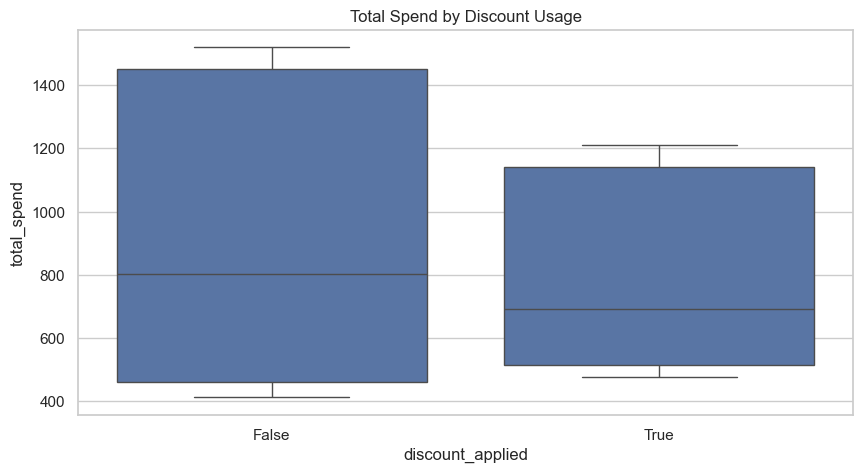

In [20]:
sns.boxplot(x="discount_applied", y="total_spend", data=df)
plt.title("Total Spend by Discount Usage")
plt.show()


## 12. Satisfaction Level & Spend

Exploring the relationship between customer satisfaction and spending.


In [21]:
df.groupby("satisfaction_level")["total_spend"].mean()

satisfaction_level
Neutral         616.414019
Satisfied      1280.319200
Unsatisfied     595.136207
Name: total_spend, dtype: float64

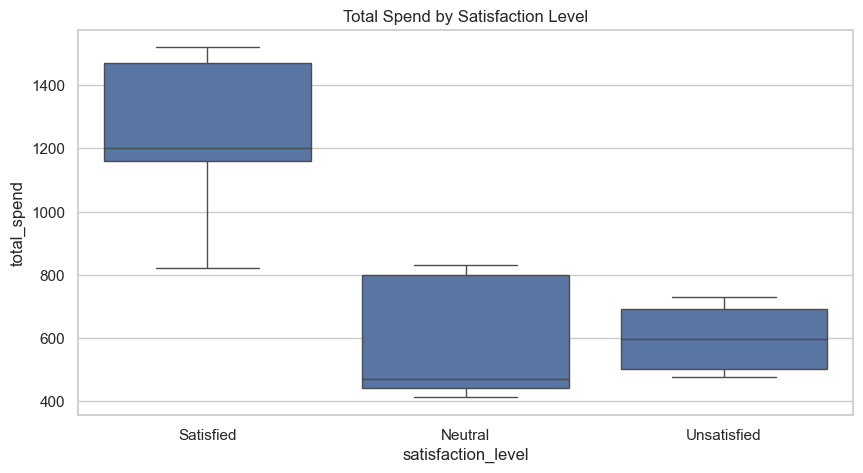

In [22]:
sns.boxplot(x="satisfaction_level", y="total_spend", data=df)
plt.title("Total Spend by Satisfaction Level")
plt.show()


## 13. Key Insights from EDA

- Customer spending is right-skewed, with a small group of high-value customers.
- Membership tiers strongly correlate with average spend and total revenue.
- Customers who received discounts tend to have different spending behavior, indicating price sensitivity.
- Recency (days since last purchase) shows clear separation between active and at-risk customers.
- Satisfaction level appears linked to spending, suggesting experience impacts customer value.

These insights guide feature engineering and ML model design in the next stage.
